[[1.         0.67614824 0.6432336  0.59915148 0.53864891]
 [0.67614824 1.         0.63545358 0.51022762 0.42626893]
 [0.6432336  0.63545358 1.         0.51276126 0.42462103]
 [0.59915148 0.51022762 0.51276126 1.         0.69878911]
 [0.53864891 0.42626893 0.42462103 0.69878911 1.        ]]


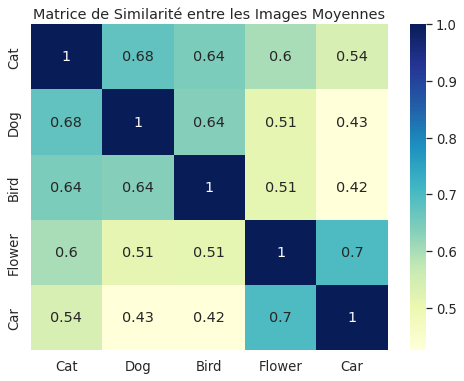

In [7]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Chargez vos images
image3 = cv2.imread('image_moyenne_bird.png')
image5 = cv2.imread('img_moy_cars.png')
image1 = cv2.imread('img_moy_cat.png')
image2 = cv2.imread('img_moy_dog.png')
image4 = cv2.imread('img_moy_flower.png')

# Convertissez les images en histogrammes de couleurs (ici, nous utilisons l'histogramme en niveaux de gris)
hist1 = cv2.calcHist([cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist4 = cv2.calcHist([cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist5 = cv2.calcHist([cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])

# Calculez la similarité entre les histogrammes de couleurs (par exemple, distance de Bhattacharyya)
similarity_matrix = np.zeros((5, 5))
for i, hist_i in enumerate([hist1, hist2, hist3, hist4, hist5]):
    for j, hist_j in enumerate([hist1, hist2, hist3, hist4, hist5]):
        similarity = cv2.compareHist(hist_i, hist_j, cv2.HISTCMP_BHATTACHARYYA)
        similarity_matrix[i][j] = 1-similarity

word_list = word_list = ["Cat", "Dog", "Bird", "Flower", "Car"]
# La matrice de similarité est maintenant créée
print(similarity_matrix)
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=word_list, yticklabels=word_list, cmap="YlGnBu")
plt.title("Matrice de Similarité entre les Images Moyennes")
plt.show()